In [5]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [6]:
file = r'C:\Users\Yifan\Desktop\2021Fall\Data Bootcamp\midterm project\DB_MidtermSampleData_Oct21.csv'
url = 'https://reveliolabs.s3.us-east-2.amazonaws.com/DB_MidtermSampleData_Oct21.csv'
df = pd.read_csv(file)
df['sector'].unique()

array(['Communication', 'Health Care', 'Industrials',
       'Information Technology', 'Financials', 'Consumer Discretionary',
       'Consumer Staples'], dtype=object)

<AxesSubplot:>

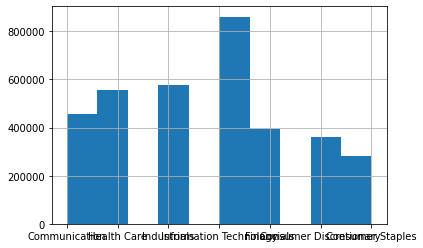

In [43]:
df['sector'].hist()

<AxesSubplot:>

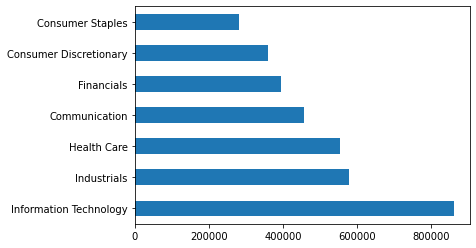

In [44]:
df['sector'].value_counts().plot(kind = 'barh')

In [45]:
tech = df[df['sector']=='Information Technology']
tech

,company,sector,month,job_category,seniority,region,gender,count,inflow,outflow
188,Accenture PLC,Information Technology,2018-07,marketing,2,Eastern Asia,male,58.626682,2.601,1.384
189,Accenture PLC,Information Technology,2018-11,marketing,2,Eastern Asia,male,56.546682,0.461,0.000
190,Accenture PLC,Information Technology,2018-07,sales,2,Eastern Asia,male,66.328521,1.418,0.000
191,Accenture PLC,Information Technology,2019-05,sales,2,Eastern Asia,male,60.596521,0.886,0.000
192,Accenture PLC,Information Technology,2019-10,sales,2,Eastern Asia,male,59.763521,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...
3488749,SAP SE,Information Technology,2020-02,administrative,4,Northern Africa,male,0.000000,0.000,0.000
3488750,Oracle Corporation,Information Technology,2018-05,technician,1,Eastern Asia,female,10.528882,0.000,0.000
3488751,Oracle Corporation,Information Technology,2019-11,technician,1,Eastern Asia,female,10.528882,0.000,0.000
3488752,Oracle Corporation,Information Technology,2020-09,technician,1,Eastern Asia,female,10.528882,0.000,0.000


In [46]:
tech['company'].value_counts()

MICROSOFT CORPORATION                          47430
Dell Technologies Inc                          47250
International Business Machines Corporation    47070
Apple, Inc.                                    46890
Oracle Corporation                             46800
HP Inc                                         46530
Intel Corporation                              46530
Hewlett Packard Enterprise Company             46350
SAP SE                                         46350
IQVIA                                          46260
Tata Group                                     46080
Accenture PLC                                  45810
Cisco Systems, Inc.                            44820
DXC Technology Co                              44550
Atos SE                                        44280
Infosys Ltd                                    43020
Capgemini SE                                   42390
Wipro Ltd                                      41940
HCL Technologies Ltd                          

In [8]:
# Create a dataframe that contains only the four tech companies we want
company_list = ['Dell Technologies Inc','Apple, Inc.','HP Inc','Hewlett Packard Enterprise Company']
tech = df[df['company'] == company_list[0]].copy()
for i in range(len(company_list)):
    if i!=0:
        tech = tech.append(df[df['company'] == company_list[i]])
tech['company'].unique()

array(['Dell Technologies Inc', 'Apple, Inc.', 'HP Inc',
       'Hewlett Packard Enterprise Company'], dtype=object)

In [9]:
#Creat a new column "liquidity", the entry of the row equals 'inflow'+'outflow'
tech['Liquidity'] = tech['inflow'] + tech['outflow']

In [35]:
#Filter them by seniority
sen_1 = tech[tech['seniority']==1].copy()
sen_2 = tech[tech['seniority']==2].copy()
sen_3 = tech[tech['seniority']==3].copy()
sen_4 = tech[tech['seniority']==4].copy()

In [47]:
def lqd_agnst_time(dataframe):
    '''
    Input: dataframe of a company filtered by seniority
    Return: 2 lists. One contains outflows of the given dataframe. The other contains inflows of the given
    data frame
    '''
    df = dataframe
    
    year = ['2018','2019','2020','2021']
    month = ['01', '02', '03', '04', '05','06','07','08','09','10','11','12']
    yr_mon = []
    for yr in year:
        for m in month:
            if( not (yr>'2020' and m>'09')):
                yr_mon.append(yr+'-'+m)
                
    inflow_sum = []
    outflow_sum = []

    for m in yr_mon:
        inflow_sum.append(df[df['month'] == m]['inflow'].sum())
        outflow_sum.append(df[df['month'] == m]['outflow'].sum())
    return inflow_sum, outflow_sum

Text(0.5, 1.0, 'Dell Seneority 1 Liquidity')

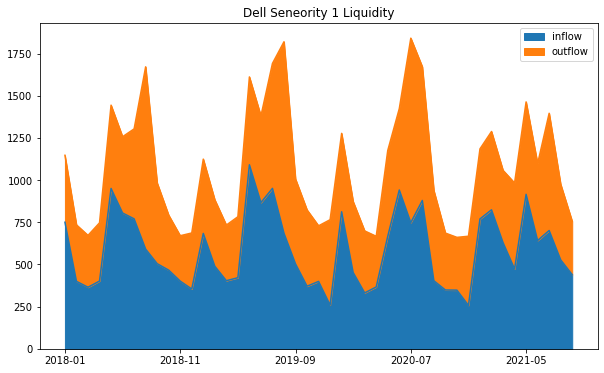

In [55]:
#Filter the df by dell
dell = sen_1[sen_1['company']=='Dell Technologies Inc']
inflow, outflow = lqd_agnst_time(dell)
    

dell_lqd = pd.DataFrame(list(zip(inflow, outflow)),columns=['inflow', 'outflow'] ,index = yr_mon)
dell_lqd.plot.area(figsize=(10,6))
plt.title('Dell Seneority 1 Liquidity')

Text(0.5, 1.0, 'Dell Seneority 2 Liquidity')

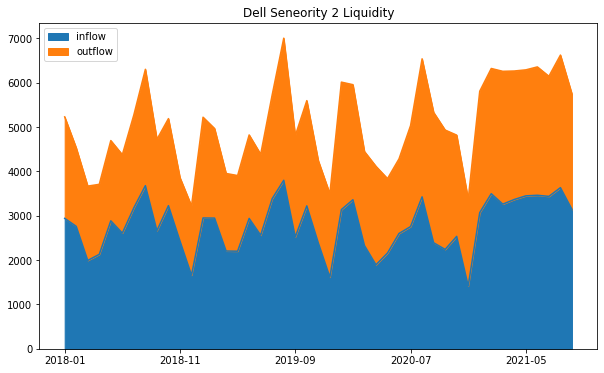

In [60]:
dell = sen_2[sen_2['company']=='Dell Technologies Inc']
inflow, outflow = lqd_agnst_time(dell)
    

dell_lqd = pd.DataFrame(list(zip(inflow, outflow)),columns=['inflow', 'outflow'] ,index = yr_mon)
dell_lqd.plot.area(figsize=(10,6))
plt.title('Dell Seneority 2 Liquidity')

Text(0.5, 1.0, 'Dell Seneority 3 Liquidity')

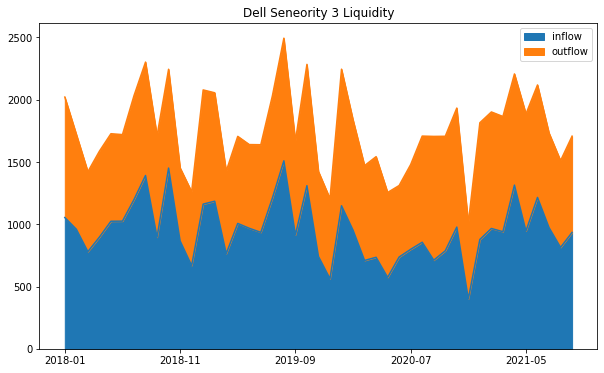

In [62]:
dell = sen_3[sen_3['company']=='Dell Technologies Inc']
inflow, outflow = lqd_agnst_time(dell)
    

dell_lqd = pd.DataFrame(list(zip(inflow, outflow)),columns=['inflow', 'outflow'] ,index = yr_mon)
dell_lqd.plot.area(figsize=(10,6))
plt.title('Dell Seneority 3 Liquidity')

Text(0.5, 1.0, 'Dell Seneority 4 Liquidity')

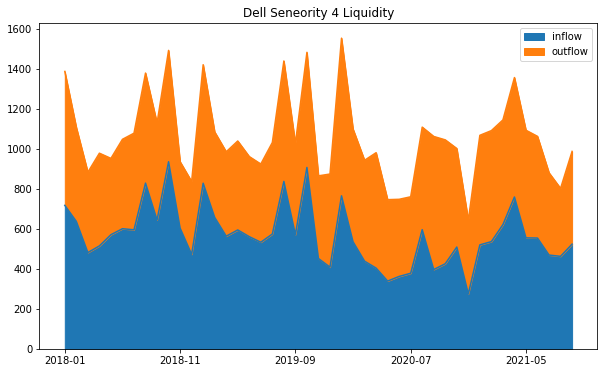

In [66]:
dell = sen_4[sen_4['company']=='Dell Technologies Inc']
inflow, outflow = lqd_agnst_time(dell)
    

dell_lqd = pd.DataFrame(list(zip(inflow, outflow)),columns=['inflow', 'outflow'] ,index = yr_mon)
dell_lqd.plot.area(figsize=(10,6))
plt.title('Dell Seneority 4 Liquidity')

In [32]:
cols_keep = ['company', 'seniority','count','inflow','outflow','month']

tech_selected = tech[cols_keep].copy()

tech_selected

,company,seniority,count,inflow,outflow,month
188,Accenture PLC,2,58.626682,2.601,1.384,2018-07
189,Accenture PLC,2,56.546682,0.461,0.000,2018-11
190,Accenture PLC,2,66.328521,1.418,0.000,2018-07
191,Accenture PLC,2,60.596521,0.886,0.000,2019-05
192,Accenture PLC,2,59.763521,0.000,0.000,2019-10
...,...,...,...,...,...,...
3488749,SAP SE,4,0.000000,0.000,0.000,2020-02
3488750,Oracle Corporation,1,10.528882,0.000,0.000,2018-05
3488751,Oracle Corporation,1,10.528882,0.000,0.000,2019-11
3488752,Oracle Corporation,1,10.528882,0.000,0.000,2020-09


In [38]:
dell = tech_selected[tech_selected['company']=='Dell Technologies Inc']
dell

,company,seniority,count,inflow,outflow,month
1959,Dell Technologies Inc,2,222.293158,2.655,0.000,2018-08
1960,Dell Technologies Inc,2,245.043050,2.891,0.000,2019-07
2266,Dell Technologies Inc,4,144.757464,2.207,0.002,2019-06
2267,Dell Technologies Inc,4,138.135044,0.000,0.000,2020-05
2268,Dell Technologies Inc,4,139.454044,1.319,0.932,2020-06
...,...,...,...,...,...,...
3488511,Dell Technologies Inc,1,6.255721,0.000,0.000,2018-03
3488512,Dell Technologies Inc,1,6.255721,0.000,0.000,2018-06
3488702,Dell Technologies Inc,4,3.527000,0.000,0.000,2018-07
3488703,Dell Technologies Inc,4,3.527000,0.000,0.000,2018-11


In [40]:
#turn_over_rate = (inflow-outflow)/count 

# create a turn over rate and study the association between turn over rate and seniority in a company in a period of time 
dell.loc['turn_over']= (dell['inflow']-dell['outflow'])/dell['count']

c:\users\yifan\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
